In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import pyrotd
from scipy import integrate

In [2]:
import sys
sys.path.append('./REQPY-master/')
from REQPY_Module import REQPY_single, load_PEERNGA_record

In [3]:
THs = pd.read_csv('motion_suit.csv', header=None)
def read_peer_record(file):
    with open(file) as f:
        f.readline()
        f.readline()
        f.readline()
        dt = np.float(f.readline().split(',')[1].split('=')[1][:9])
        data = []
        for line in f:
            for val in line.strip().split():
                data.append(float(val))
        return dt , np.array(data)

In [4]:
target_psa = np.loadtxt('PEER_ART_AVG.csv',delimiter=',')
dampratio = 0.05                              # damping ratio for spectra
TL1 = 0.02; TL2 = 6
To = target_psa[:,0]              # original target spectrum periods
dso = target_psa[:,1]             # original target spectrum psa

In [5]:
time_histories = {}
for i,th in THs.iterrows():
    dt, data = read_peer_record('PEERNGARecords_Unscaled'+ '/' + th[0].split('\\')[-1])
    time = np.linspace(0,(len(data)-1)*dt,len(data))
    vel = integrate.cumtrapz(data,time, initial=0.0)
    disp = integrate.cumtrapz(vel,time, initial=0.0)
    fs = 1/dt
    ccs,rms,misfit,cvel,cdespl,PSAccs,PSAs,T,sf = REQPY_single(data,fs,dso,To,
                                                    T1=TL1,T2=TL2,zi=dampratio,
                                                    nit=15,NS=100,
                                                    baseline=1,plots=0)
    time_histories[i] = {'file':th[0].split('\\')[-1], 'scale':th[1], \
                         'original_time_history':{'accl':data,'vel':vel,'disp':disp, 'time':time},\
                         'modified_time_history':{'accl':ccs,'vel':cvel,'disp':cdespl, 'time':time},\
                         'original_psa':{'period':T,'PSa':PSAs},\
                         'modified_pas':{'period':T,'PSa':PSAccs}}


Wavelet decomposition performed
Detail functions generated
Now performing iteration 1 of 15
Now performing iteration 2 of 15
Now performing iteration 3 of 15
Now performing iteration 4 of 15
Now performing iteration 5 of 15
Now performing iteration 6 of 15
Now performing iteration 7 of 15
Now performing iteration 8 of 15
Now performing iteration 9 of 15
Now performing iteration 10 of 15
Now performing iteration 11 of 15
Now performing iteration 12 of 15
Now performing iteration 13 of 15
Now performing iteration 14 of 15
Now performing iteration 15 of 15
**now performing baseline correction**
**baseline correction was succesful**
RMSE : 3.16 %
AVG. MISFIT : 2.44 %
Wavelet decomposition performed
Detail functions generated
Now performing iteration 1 of 15
Now performing iteration 2 of 15
Now performing iteration 3 of 15
Now performing iteration 4 of 15
Now performing iteration 5 of 15
Now performing iteration 6 of 15
Now performing iteration 7 of 15
Now performing iteration 8 of 15
Now p

Now performing iteration 1 of 15
Now performing iteration 2 of 15
Now performing iteration 3 of 15
Now performing iteration 4 of 15
Now performing iteration 5 of 15
Now performing iteration 6 of 15
Now performing iteration 7 of 15
Now performing iteration 8 of 15
Now performing iteration 9 of 15
Now performing iteration 10 of 15
Now performing iteration 11 of 15
Now performing iteration 12 of 15
Now performing iteration 13 of 15
Now performing iteration 14 of 15
Now performing iteration 15 of 15
**now performing baseline correction**
**baseline correction was succesful**
RMSE : 4.12 %
AVG. MISFIT : 2.96 %
Wavelet decomposition performed
Detail functions generated
Now performing iteration 1 of 15
Now performing iteration 2 of 15
Now performing iteration 3 of 15
Now performing iteration 4 of 15
Now performing iteration 5 of 15
Now performing iteration 6 of 15
Now performing iteration 7 of 15
Now performing iteration 8 of 15
Now performing iteration 9 of 15
Now performing iteration 10 of 

Now performing iteration 14 of 15
Now performing iteration 15 of 15
**now performing baseline correction**
**baseline correction was succesful**
RMSE : 3.76 %
AVG. MISFIT : 2.66 %
Wavelet decomposition performed
Detail functions generated
Now performing iteration 1 of 15
Now performing iteration 2 of 15
Now performing iteration 3 of 15
Now performing iteration 4 of 15
Now performing iteration 5 of 15
Now performing iteration 6 of 15
Now performing iteration 7 of 15
Now performing iteration 8 of 15
Now performing iteration 9 of 15
Now performing iteration 10 of 15
Now performing iteration 11 of 15
Now performing iteration 12 of 15
Now performing iteration 13 of 15
Now performing iteration 14 of 15
Now performing iteration 15 of 15
**now performing baseline correction**
**baseline correction was succesful**
RMSE : 3.91 %
AVG. MISFIT : 2.68 %
Wavelet decomposition performed
Detail functions generated
Now performing iteration 1 of 15
Now performing iteration 2 of 15
Now performing iteratio

Now performing iteration 1 of 15
Now performing iteration 2 of 15
Now performing iteration 3 of 15
Now performing iteration 4 of 15
Now performing iteration 5 of 15
Now performing iteration 6 of 15
Now performing iteration 7 of 15
Now performing iteration 8 of 15
Now performing iteration 9 of 15
Now performing iteration 10 of 15
Now performing iteration 11 of 15
Now performing iteration 12 of 15
Now performing iteration 13 of 15
Now performing iteration 14 of 15
Now performing iteration 15 of 15
**now performing baseline correction**
**baseline correction was succesful**
RMSE : 4.57 %
AVG. MISFIT : 3.14 %
Wavelet decomposition performed
Detail functions generated
Now performing iteration 1 of 15
Now performing iteration 2 of 15
Now performing iteration 3 of 15
Now performing iteration 4 of 15
Now performing iteration 5 of 15
Now performing iteration 6 of 15
Now performing iteration 7 of 15
Now performing iteration 8 of 15
Now performing iteration 9 of 15
Now performing iteration 10 of 

**baseline correction was succesful**
RMSE : 3.84 %
AVG. MISFIT : 2.46 %


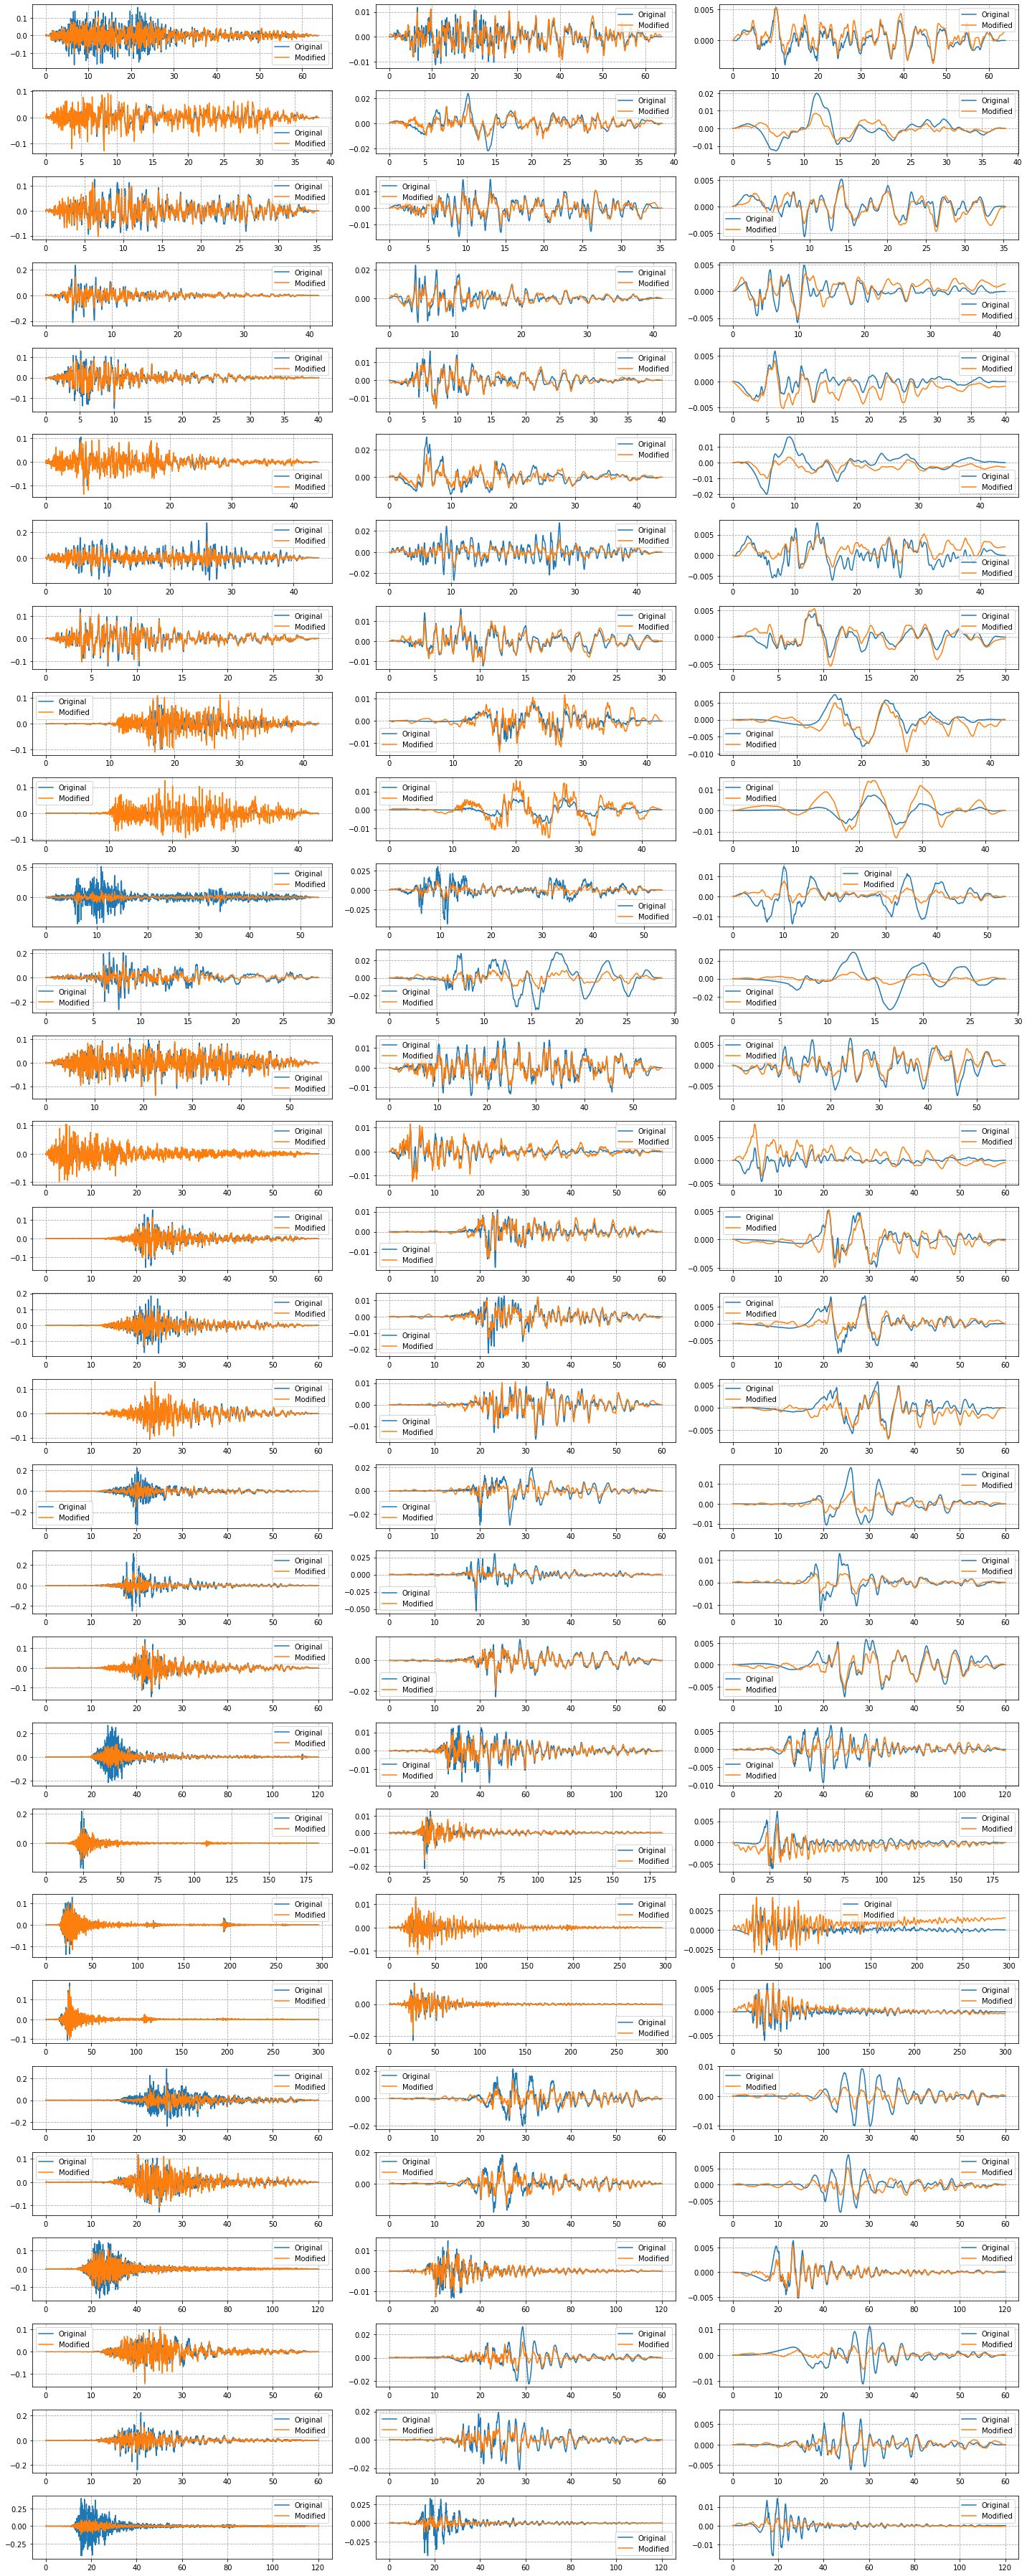

In [7]:
fig, axs = plt.subplots(30,3,figsize=(20,50))
for i,th in time_histories.items():
    # Accelerations
    axs[i,0].plot(th['original_time_history']['time'],th['original_time_history']['accl'],\
                  label='Original')
    axs[i,0].plot(th['modified_time_history']['time'],th['modified_time_history']['accl'],\
                  label='Modified')
    # Velocity
    axs[i,1].plot(th['original_time_history']['time'],th['original_time_history']['vel'],\
                  label='Original')
    axs[i,1].plot(th['modified_time_history']['time'],th['modified_time_history']['vel'],\
                  label='Modified')
    # Displacemnt
    axs[i,2].plot(th['original_time_history']['time'],th['original_time_history']['disp'],\
                  label='Original')
    axs[i,2].plot(th['modified_time_history']['time'],th['modified_time_history']['disp'],\
                  label='Modified')
    axs[i,0].grid(b=True, which='both', color='0.65', linestyle='--')
    axs[i,0].legend()
    axs[i,1].grid(b=True, which='both', color='0.65', linestyle='--')
    axs[i,1].legend()
    axs[i,2].grid(b=True, which='both', color='0.65', linestyle='--')
    axs[i,2].legend()
fig.tight_layout()
plt.savefig('Modified_THs.pdf', dpi=400)

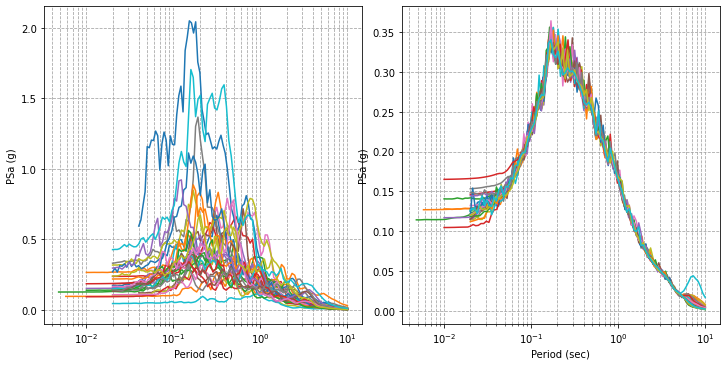

In [10]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
for i,th in time_histories.items():
    axs[0].semilogx(th['original_psa']['period'],th['original_psa']['PSa'],\
                  label=th['file'])
    axs[1].semilogx(th['modified_pas']['period'],th['modified_pas']['PSa'],\
                  label=th['file'])
    axs[0].grid(b=True, which='both', color='0.65', linestyle='--')
#    axs[0].legend()
    axs[1].grid(b=True, which='both', color='0.65', linestyle='--')
#    axs[1].legend()
fig.tight_layout()
axs[0].set_xlabel('Period (sec)')
axs[1].set_xlabel('Period (sec)')
axs[0].set_ylabel('PSa (g)')
axs[1].set_ylabel('PSa (g)')
plt.savefig('Modified_PSA.pdf', dpi=400)

In [ ]:
#plt.semilogx(T,PSAs)
plt.semilogx(T,PSAccs)
plt.semilogx(target_psa[:,0],target_psa[:,1])